In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.append("../src/")
from fLe_timecrystal import fle
import fBm_stats as fbs
plt.style.use("plot_style.mplstyle")
realizations = 20000

In [2]:
def msd(alpha, T, realizations, h,
        v0 = 0, M = 1,
        eta_1 = 1, eta_2 = 1,
        T1 = 1, T2 = 1, linear = True):
    for r in tqdm(range(realizations)):
        eq = fle(alpha, linear = linear)
        eq.params(T = T, h = h,
                  v0 = v0, M = M,
                  eta_1 = eta_1, eta_2 = eta_2,
                  T1 = T1, T2 = T2)
        eq.make_B_H()
        eq.solve()  
        if r == 0:
            df_msd = pd.DataFrame({"t": eq.t})
        df_msd["x_"+str(r)] = eq.numerical        
    df_msd.set_index("t", inplace = True)
    msd = fbs.msd(df_msd, False)
    return msd

In [3]:
def plot_msd(ax, alpha, T, realizations = 100, h = 0.1,
             v0 = 0, M = 1,
             eta_1 = 1, eta_2 = 1,
             T1 = 1, T2 = 1, linear = True):
    eq = fle(alpha, linear = linear)
    eq.params(T = T, h = h,
              v0 = v0, M = M,
              eta_1 = eta_1, eta_2 = eta_2,
              T1 = T1, T2 = T2)
    eq.make_B_H()
    if linear == True:
        eq.get_analytical_msd()
        anl_msd = eq.analytical_msd
    else:
        if eta_1 == 0:
            eq.get_analytical_colored_msd()
            anl_msd = eq.analytical_colored_msd
            

    df_msd = pd.DataFrame(msd(alpha, T, realizations, h,
                              v0 = v0, M = M,
                              eta_1 = eta_1, eta_2 = eta_2,
                              T1 = T1, T2 = T2), columns=["msd"])

    ax.plot(eq.t, anl_msd, label = "Analytical")
    ax.plot(df_msd.index, df_msd.msd, label = "Numerical", ls = ":")
    ax.set_title(r"$\alpha =$"+f"{alpha}")
    ax.legend()

0.04


100%|██████████| 400/400 [00:07<00:00, 56.26it/s]


0.4


100%|██████████| 400/400 [00:02<00:00, 146.55it/s]


0.6


100%|██████████| 400/400 [00:02<00:00, 144.46it/s]


0.99


100%|██████████| 400/400 [00:03<00:00, 128.85it/s]


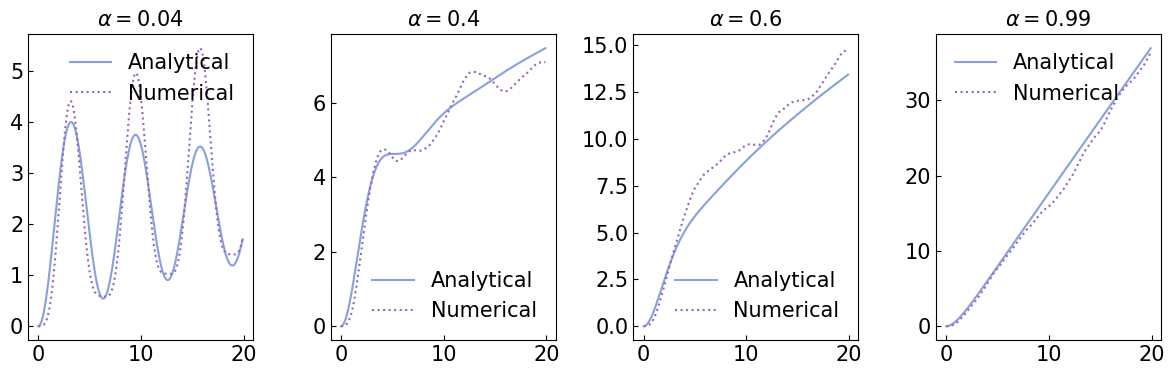

In [5]:
fig, ax = plt.subplots(1,4, figsize = (12,4))
h = 0.1
T = 20
M = 1
linear = False
eta_1 = 0#float(sys.argv[3])
eta_2 = 1#float(sys.argv[4])
T2 = 1#float(sys.argv[6])
v0 = 1


axi=ax[0]
alpha = 0.04
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[1]
alpha = 0.4
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[2]
alpha = 0.6
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[3]
alpha = 0.99
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

0.04


100%|██████████| 400/400 [00:06<00:00, 58.50it/s]


0.4


100%|██████████| 400/400 [00:02<00:00, 140.20it/s]


0.6


100%|██████████| 400/400 [00:02<00:00, 140.84it/s]


0.99


100%|██████████| 400/400 [00:03<00:00, 128.18it/s]


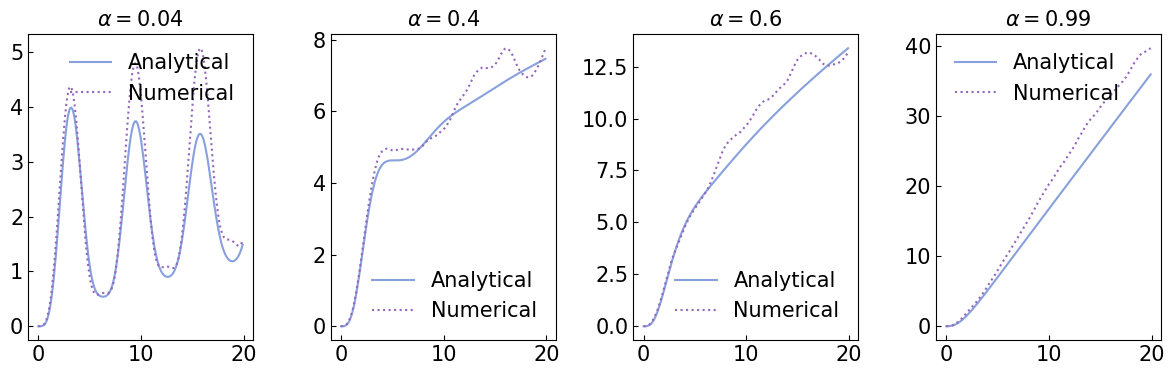

In [9]:
fig, ax = plt.subplots(1,4, figsize = (12,4))
h = 0.1
T = 20
M = 1
linear = False
eta_1 = 0#float(sys.argv[3])
eta_2 = 1#float(sys.argv[4])
T2 = 1#float(sys.argv[6])
v0 = 0


axi=ax[0]
alpha = 0.04
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[1]
alpha = 0.4
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[2]
alpha = 0.6
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[3]
alpha = 0.99
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

# FLE IN THERMAL EQUILIBRIUM + LINEAR FORCE

0.04


100%|██████████| 400/400 [00:27<00:00, 14.50it/s]


0.4


100%|██████████| 400/400 [00:11<00:00, 35.60it/s]


0.6


100%|██████████| 400/400 [00:10<00:00, 36.95it/s]


0.99


100%|██████████| 400/400 [00:10<00:00, 36.86it/s]


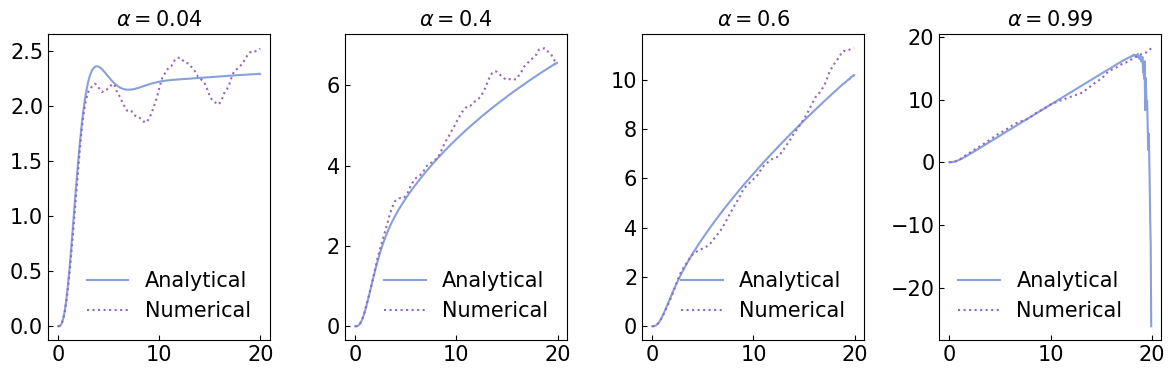

In [6]:
fig, ax = plt.subplots(1,4, figsize = (12,4))
h = 0.05
T = 20
realizations = 400
linear = True
M = 1
eta_1 = 1#float(sys.argv[3])
eta_2 = 1#float(sys.argv[4])
T1 = 1#float(sys.argv[5])
T2 = 1#float(sys.argv[6])
v0 = 0


axi=ax[0]
alpha = 0.04
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[1]
alpha = 0.4
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[2]
alpha = 0.6
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)

axi=ax[3]
alpha = 0.99
print(alpha)
plot_msd(axi, alpha, T, realizations,  h,
         v0, M, eta_1, eta_2, T2, linear = linear)


In [11]:
T = 20
h = 0.1

In [12]:
eq = fle(alpha = 0.4)
eq.params(T = T, h = h,
           v0 = 0, M = 1,
           eta_1 = 1, eta_2 = 1,
           T1 = 1, T2 = 1)
eq.make_B_H()
eq.solve()
eq.get_analytical()

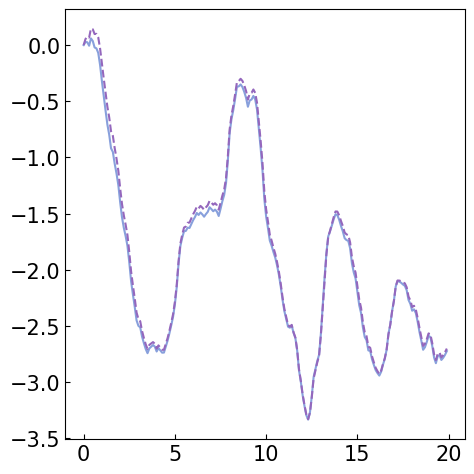

In [13]:
plt.plot(eq.t, eq.analytical)
plt.plot(eq.t, eq.numerical, ls = "--")